<a href="https://colab.research.google.com/github/arash7m/LogisticRegressionTitanic/blob/main/Logistic_Regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
import plotly.graph_objects as go

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Udemy Machine Learning/13-Logistic-Regression/titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sometimes we have missing data. So let's doa heatmap to see where most of the missing data is located.

For example the "NaN" values above indicate the missing values

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


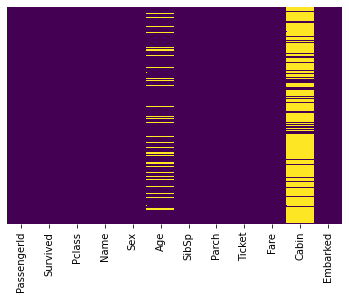

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As we can see, the Cabin feature has a big chunk of its data missing. It's so big that in the future we either have to drop it, or change it in some way.


# Part I: Visualizations


Let's do some visualizations for now to better understand the data.

In [6]:
sns.set_style('darkgrid')

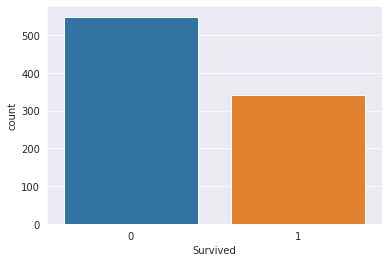

In [7]:
sns.countplot(x='Survived', data=train)

Around 550 people didn't survive, judging from this database. And 330 people survived, roughly speaking.

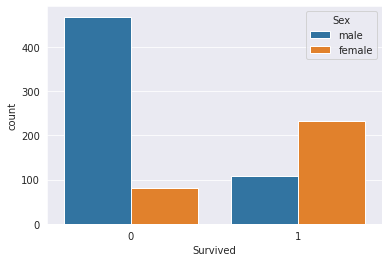

In [9]:
 sns.countplot(x='Survived', hue='Sex', data=train)

The people who didn't survive where mostly male, while the people who did survive were mostly female (even more than half)

It's going to come in play where we are checking the factors of coefficiency that led to survival of some.

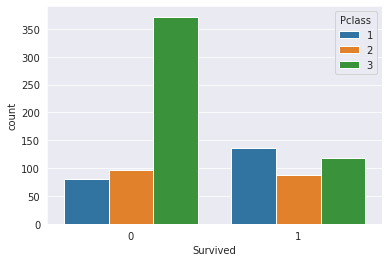

In [10]:
#Pclass stands for Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=train)

So most of the people that didn't survive were in the 3rd class (the cheapest) and most of the survivors, although not that drasting, are leaning more towards 1st class (the most expensive).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


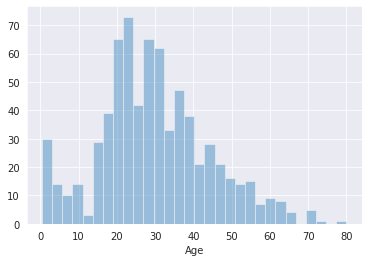

In [12]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)
#dropna() to drop the Null values
#kde=False because we just want to see a distribution plot

Many children, and the average age is around 20-30 so quite a number of young passengers. 

Now let's explore some of the other columns.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


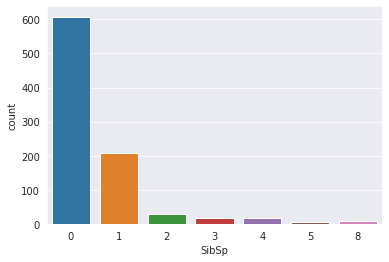

In [17]:
#SibSp is for the number of siblings or spouses
sns.countplot(x='SibSp',data=train)

Most people didn't have spouses or children on board. They were mostly single. Probably mostly young men.

In [20]:
train['Fare']
#The fares the passengers paid

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

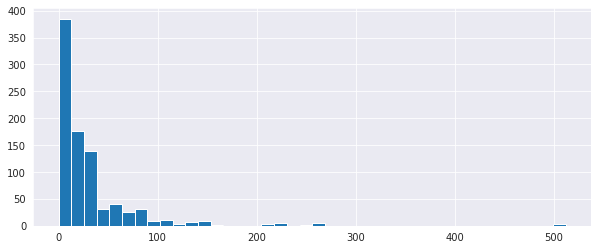

In [36]:
train['Fare'].hist(bins=40, figsize=(10,4))

Most of the fares were paid by the people in the lower classes, therefore from 0 to below 100.

If we wanted to take a look at the interactive histogram of it:

In [38]:
import plotly.express as px
fig = px.histogram(train, x="Fare")
fig.show()